# Twitter Sentiment Analysis

In [78]:
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
import string
import numpy as np
import pandas as pd

In [79]:
positive_tweets = twitter_samples.strings("positive_tweets.json")
negative_tweets = twitter_samples.strings("negative_tweets.json")

tweets = positive_tweets + negative_tweets

print("Number of tweets: ", len(tweets))

Number of tweets:  10000


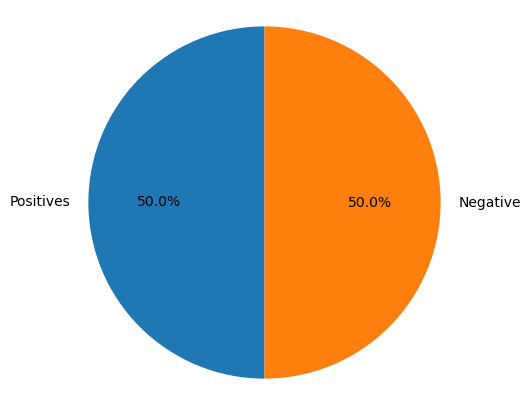

In [80]:
fig = plt.figure(figsize=(5, 5))

labels = "Positives", "Negative"
sizes = [len(positive_tweets), len(negative_tweets)]

plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)
plt.axis("equal")
plt.show()

In [81]:
def process_tweet(tweet):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet

    """
    stemmer = WordNetLemmatizer()
    stopwords_english = stopwords.words("english")
    # remove stock market tickers like $GE
    tweet = re.sub(r"\$\w*", "", tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r"^RT[\s]+", "", tweet)
    # remove hyperlinks
    tweet = re.sub(r"https?://[^\s\n\r]+", "", tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r"#", "", tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (
            word not in stopwords_english  # remove stopwords
            and word not in string.punctuation
        ):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.lemmatize(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean

In [82]:
labels = np.append(np.ones((len(positive_tweets))), np.zeros((len(negative_tweets))))
print(f"Positive Shape: {labels[labels == 1].shape}")
print(f"Negative Shape: {labels[labels == 0].shape}")

Positive Shape: (5000,)
Negative Shape: (5000,)


In [83]:
tweets[2], process_tweet(tweets[2])

('@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!',
 ['listen', 'last', 'night', ':)', 'bleed', 'amazing', 'track', 'scotland'])

In [84]:
labels

array([1., 1., 1., ..., 0., 0., 0.])

In [85]:
df = pd.DataFrame({"tweet": tweets, "label": labels})
df

,tweet,label
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,1.0
1,@Lamb2ja Hey James! How odd :/ Please call our...,1.0
2,@DespiteOfficial we had a listen last night :)...,1.0
3,@97sides CONGRATS :),1.0
4,yeaaaah yippppy!!! my accnt verified rqst has...,1.0
...,...,...
9995,I wanna change my avi but uSanele :(,0.0
9996,MY PUPPY BROKE HER FOOT :(,0.0
9997,where's all the jaebum baby pictures :((,0.0
9998,But but Mr Ahmad Maslan cooks too :( https://t...,0.0


In [86]:
df["tweet"] = df["tweet"].apply(lambda x: process_tweet(x))
df

,tweet,label
0,"[followfriday, top, engaged, member, community...",1.0
1,"[hey, james, odd, :/, please, call, contact, c...",1.0
2,"[listen, last, night, :), bleed, amazing, trac...",1.0
3,"[congrats, :)]",1.0
4,"[yeaaah, yipppy, accnt, verified, rqst, succee...",1.0
...,...,...
9995,"[wanna, change, avi, usanele, :(]",0.0
9996,"[puppy, broke, foot, :(]",0.0
9997,"[where's, jaebum, baby, picture, :(]",0.0
9998,"[mr, ahmad, maslan, cook, :(]",0.0


In [87]:
df["tweet"] = df["tweet"].apply(lambda x: " ".join(x))

In [88]:
df.loc[0]["tweet"]

'followfriday top engaged member community week :)'

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(df["tweet"])
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [90]:
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.741


In [91]:
new_tweets = [
    "@TechieTom Just finished a deep dive into ML algorithms. Excited to apply what I have learned! #AI #DataScience",
    "@DataNerd99 Exploring data visualization today. Amazing how a good graph tells a story—feeling inspired! #DataViz #Python",
    "@FlutterFan23 Who else is using Flutter? Love how easy it is to create beautiful UIs! #AppDev",
    "@CodingChick Had a productive study session. Ready to tackle algorithms next week! #ComputerScience",
    "@MLJourney Reading 'Hands-On ML' and feeling inspired. Can not wait to implement more projects! #ML #Learning",
    "@CoffeeCoder Coffee and coding are the best combo. What is your study fuel? #StudentLife",
    "@ResearchRover Just submitted my research proposal. Nervous but hopeful! #Research #AcademicLife",
    "@DataExplorer Learning about EDA in ML projects. Data speaks for itself—such an eye-opener! #DataScience",
    "@StudyBuddy21 Summer break is almost over. Excited but anxious for new challenges! #BackToSchool",
    "@LanguageLover Trying to improve my English. Feeling overwhelmed—any tips? #LanguageLearning",
    "@TitanicDataPro Completed a project using the Titanic dataset. Proud of my progress with pandas! #DataScience",
    "@MusicForCoders Looking for new music to code to. Feeling stuck—recommendations? #Music #Coding",
    "@FinanceDev Excited to start my financial literacy app. Empowering students feels rewarding! #FinTech #AppDev",
    "@LatexLearner Spent the day learning LaTeX. Feeling accomplished but have more to learn! #AcademicLife #Writing",
    "@RainyDayCoder Enjoying the rainy vibes while working on projects. Hope it does not distract me too much! #Philippines #Productivity",
]

processed_tweet = [" ".join(process_tweet(tweet)) for tweet in new_tweets]

test_utterances_tfidf = vectorizer.transform(processed_tweet)
predictions = model.predict(test_utterances_tfidf)

print(predictions)

[1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1.]


In [92]:
new_tweets

['@TechieTom Just finished a deep dive into ML algorithms. Excited to apply what I have learned! #AI #DataScience',
 '@DataNerd99 Exploring data visualization today. Amazing how a good graph tells a story—feeling inspired! #DataViz #Python',
 '@FlutterFan23 Who else is using Flutter? Love how easy it is to create beautiful UIs! #AppDev',
 '@CodingChick Had a productive study session. Ready to tackle algorithms next week! #ComputerScience',
 "@MLJourney Reading 'Hands-On ML' and feeling inspired. Can not wait to implement more projects! #ML #Learning",
 '@CoffeeCoder Coffee and coding are the best combo. What is your study fuel? #StudentLife',
 '@ResearchRover Just submitted my research proposal. Nervous but hopeful! #Research #AcademicLife',
 '@DataExplorer Learning about EDA in ML projects. Data speaks for itself—such an eye-opener! #DataScience',
 '@StudyBuddy21 Summer break is almost over. Excited but anxious for new challenges! #BackToSchool',
 '@LanguageLover Trying to improve my 

In [93]:
processed_tweet

['finished deep dive ml algorithm excited apply learned ai datascience',
 'exploring data visualization today amazing good graph tell story — feeling inspired dataviz python',
 'else using flutter love easy create beautiful uis appdev',
 'productive study session ready tackle algorithm next week computerscience',
 'reading hands-on ml feeling inspired wait implement project ml learning',
 'coffee coding best combo study fuel studentlife',
 'submitted research proposal nervous hopeful research academiclife',
 'learning eda ml project data speaks — eye-opener datascience',
 'summer break almost excited anxious new challenge backtoschool',
 'trying improve english feeling overwhelmed — tip languagelearning',
 'completed project using titanic dataset proud progress panda datascience',
 'looking new music code feeling stuck — recommendation music coding',
 'excited start financial literacy app empowering student feel rewarding fintech appdev',
 'spent day learning latex feeling accomplished

In [94]:
gg = [" ".join(process_tweet(tweet)) for tweet in new_tweets]
gg

['finished deep dive ml algorithm excited apply learned ai datascience',
 'exploring data visualization today amazing good graph tell story — feeling inspired dataviz python',
 'else using flutter love easy create beautiful uis appdev',
 'productive study session ready tackle algorithm next week computerscience',
 'reading hands-on ml feeling inspired wait implement project ml learning',
 'coffee coding best combo study fuel studentlife',
 'submitted research proposal nervous hopeful research academiclife',
 'learning eda ml project data speaks — eye-opener datascience',
 'summer break almost excited anxious new challenge backtoschool',
 'trying improve english feeling overwhelmed — tip languagelearning',
 'completed project using titanic dataset proud progress panda datascience',
 'looking new music code feeling stuck — recommendation music coding',
 'excited start financial literacy app empowering student feel rewarding fintech appdev',
 'spent day learning latex feeling accomplished

In [95]:
tt = vectorizer.transform(gg)
pred = model.predict(tt)
print(pred)

[1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
